<div id="container" style="position:relative;">
<div style="float:left"><h1> Capstone Project: Diabetes risk predictor based on health indicators</h1></div>
<div style="float:left"><h2> Notebook 4: # Modelling - Decision tree without Over Sampling, and no PCA</h2></div>
<div style="float:left"><h2> Created by Diego Villanueva</h2></div>
</div>
</div>

## Table of contents

4d. Modelling (Decision Tree)

        4d.1 Load data files

        4d.2 Modelling

        4d.3 Model evaluation

        4d.4 Observations

### Imports

In [1]:
# data manipulation
import numpy as np
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Scaling data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# File saving
import joblib 

# Temporary directories for caching
from tempfile import mkdtemp

# Cross-validation
from sklearn.model_selection import cross_val_score

# Pipeline building
from sklearn.pipeline import Pipeline

# Grid search
from sklearn.model_selection import GridSearchCV

### 4d.1 Load data files

In [2]:
X_rem = joblib.load("../data/Preprocessed_data/X_rem.pkl") # not oversampled or scaled dataset
y_rem = joblib.load("../data/Preprocessed_data/y_rem.pkl") # not oversampled or scaled dataset
X_test = joblib.load("../data/Preprocessed_data/X_test.pkl") # not scaled dataset
y_test = joblib.load("../data/Preprocessed_data/y_test.pkl") #unmodified dataset

### 4d.2 Modelling

In [3]:
# Create a directory that will be used to cache the pipeline results
cachedir = mkdtemp()

In [4]:
# Create a pipeline by passing an estimators

estimators = [('normalise', StandardScaler()), # The scaling part of the pipe
              ('dt', DecisionTreeClassifier(max_depth=3))] # The model part of the pipe, in this case a decision tree

pipe = Pipeline(estimators, memory=cachedir)
print(pipe)

Pipeline(memory='/var/folders/6c/0s0k1hv53xn7g3bpzkggst1r0000gn/T/tmp7njngy4_',
         steps=[('normalise', StandardScaler()),
                ('dt', DecisionTreeClassifier(max_depth=3))])


In [5]:
# Define the parameter grid for grid search
param_grid = {
    'dt__max_depth': [2, 5, 10, 20],  # The depth of the decision tree, 4 options
    'dt__min_samples_leaf': [1, 3, 5, 10],  # The minimum number of samples needed by leaf, 4 options
    'dt__criterion': ['gini', 'entropy']  # The criteria to measure, 2 options
}

In [6]:
# Create the grid and fit it
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5, verbose= 5, n_jobs= -1)
grid_search.fit(X_rem, y_rem)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[CV 1/5] END dt__criterion=gini, dt__max_depth=2, dt__min_samples_leaf=1;, score=0.842 total time=   1.2s
[CV 2/5] END dt__criterion=gini, dt__max_depth=2, dt__min_samples_leaf=1;, score=0.842 total time=   1.2s
[CV 3/5] END dt__criterion=gini, dt__max_depth=2, dt__min_samples_leaf=1;, score=0.842 total time=   1.2s
[CV 4/5] END dt__criterion=gini, dt__max_depth=2, dt__min_samples_leaf=1;, score=0.842 total time=   1.2s
[CV 1/5] END dt__criterion=gini, dt__max_depth=2, dt__min_samples_leaf=3;, score=0.842 total time=   0.7s
[CV 2/5] END dt__criterion=gini, dt__max_depth=2, dt__min_samples_leaf=3;, score=0.842 total time=   0.7s
[CV 3/5] END dt__criterion=gini, dt__max_depth=2, dt__min_samples_leaf=3;, score=0.842 total time=   0.8s
[CV 5/5] END dt__criterion=gini, dt__max_depth=2, dt__min_samples_leaf=1;, score=0.842 total time=   1.0s
[CV 5/5] END dt__criterion=gini, dt__max_depth=2, dt__min_samples_leaf=3;, score=0.842 total time=   0.5s
[CV 4/5] END dt__criterion=gini, dt__max_depth

GridSearchCV(cv=5,
             estimator=Pipeline(memory='/var/folders/6c/0s0k1hv53xn7g3bpzkggst1r0000gn/T/tmp7njngy4_',
                                steps=[('normalise', StandardScaler()),
                                       ('dt',
                                        DecisionTreeClassifier(max_depth=3))]),
             n_jobs=-1,
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': [2, 5, 10, 20],
                         'dt__min_samples_leaf': [1, 3, 5, 10]},
             verbose=5)

In [7]:
# Show the results from GridSearch
print(f"Best parameters {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")
print(f"Best estimator {grid_search.best_estimator_}")

Best parameters {'dt__criterion': 'gini', 'dt__max_depth': 5, 'dt__min_samples_leaf': 1}
Best Score: 0.8495066904229984
Best estimator Pipeline(memory='/var/folders/6c/0s0k1hv53xn7g3bpzkggst1r0000gn/T/tmp7njngy4_',
         steps=[('normalise', StandardScaler()),
                ('dt', DecisionTreeClassifier(max_depth=5))])


### 4d.3 Model evaluation 

In [8]:
# Create confusion matrix

# Get class predictions
y_pred = grid_search.best_estimator_.predict(X_test)

# Generate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
cf_df = pd.DataFrame(
    cf_matrix, 
    columns=["Predicted Negative Review", "Predicted Positive Review"],
    index=["True Negative Review", "True Positive Review"]
)

display(cf_df)

,Predicted Negative Review,Predicted Positive Review
True Negative Review,63086,1025
True Positive Review,10540,1453


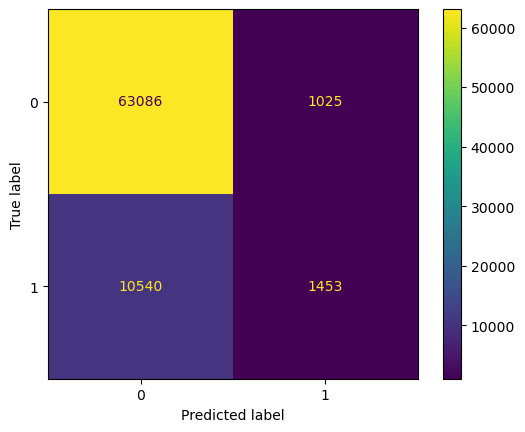

In [9]:
# Create visualisation of confusion matrix
ConfusionMatrixDisplay.from_estimator(grid_search, X_test, y_test);

In [10]:
# Classification Report
report_initial = classification_report(y_test, y_pred)
print(report_initial)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     64111
           1       0.59      0.12      0.20     11993

    accuracy                           0.85     76104
   macro avg       0.72      0.55      0.56     76104
weighted avg       0.81      0.85      0.80     76104



### 4d.4 Observations